In [1]:
# read the SMILES-MoA data  
import pandas as pd
import numpy as np
df = pd.read_csv('top_20_MOAs.txt', sep = '\t')
# df = pd.read_csv('/home/jovyan/Tomics-CP-Chem-MoA/data_for_models/all_data.csv')
len(df)
df

,SMILES,MOA
0,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(C)=O,adrenergic receptor antagonist
1,COc1cc2nc(nc(N)c2cc1OC)N(C)CCCNC(=O)C1CCCO1,adrenergic receptor antagonist
2,CC(C)NCC(O)COc1ccccc1CC=C,adrenergic receptor antagonist
3,COc1ccccc1N1CCN(CCN2C(=O)c3ccccc3C(C)(C)C2=O)CC1,adrenergic receptor antagonist
4,CC(C)(C)NCC(O)CSc1nc(cs1)-c1ccc(s1)C(N)=O,adrenergic receptor antagonist
...,...,...
1216,OCCCC(O)=O,benzodiazepine receptor agonist
1217,CN1c2ccc(Cl)cc2C(=NC(O)C1=O)c1ccccc1,benzodiazepine receptor agonist
1218,CCN(C(C)=O)c1cccc(c1)-c1ccnc2c(cnn12)C#N,benzodiazepine receptor agonist
1219,CCOC(=O)c1ncc2[nH]c3ccc(OCc4ccccc4)cc3c2c1COC,benzodiazepine receptor agonist


In [4]:
df["MOA"].value_counts()

cyclooxygenase inhibitor                   99
bacterial cell wall synthesis inhibitor    95
adrenergic receptor antagonist             95
adrenergic receptor agonist                83
acetylcholine receptor antagonist          83
glutamate receptor antagonist              74
histamine receptor antagonist              70
serotonin receptor antagonist              69
dopamine receptor antagonist               63
phosphodiesterase inhibitor                62
serotonin receptor agonist                 61
glucocorticoid receptor agonist            46
calcium channel blocker                    46
acetylcholine receptor agonist             43
PI3K inhibitor                             42
EGFR inhibitor                             40
HDAC inhibitor                             39
sodium channel blocker                     39
topoisomerase inhibitor                    37
benzodiazepine receptor agonist            35
Name: MOA, dtype: int64

In [35]:
"""# change 20 MoAs to classes 
MOA_class_dictionary = {'EGFR inhibitor': 8,
 'HDAC inhibitor': 16,
 'PI3K inhibitor': 13,
 'acetylcholine receptor agonist': 1,
 'acetylcholine receptor antagonist': 4,
 'adrenergic receptor agonist': 18,
 'adrenergic receptor antagonist': 15,
 'bacterial cell wall synthesis inhibitor': 14,
 'benzodiazepine receptor agonist': 10,
 'calcium channel blocker': 5,
 'cyclooxygenase inhibitor': 6,
 'dopamine receptor antagonist': 12,
 'glucocorticoid receptor agonist': 9,
 'glutamate receptor antagonist': 19,
 'histamine receptor antagonist': 17,
 'phosphodiesterase inhibitor': 3,
 'serotonin receptor agonist': 7,
 'serotonin receptor antagonist': 2,
 'sodium channel blocker': 11,
 'topoisomerase inhibitor': 0}"""

"# change 20 MoAs to classes \nMOA_class_dictionary = {'EGFR inhibitor': 8,\n 'HDAC inhibitor': 16,\n 'PI3K inhibitor': 13,\n 'acetylcholine receptor agonist': 1,\n 'acetylcholine receptor antagonist': 4,\n 'adrenergic receptor agonist': 18,\n 'adrenergic receptor antagonist': 15,\n 'bacterial cell wall synthesis inhibitor': 14,\n 'benzodiazepine receptor agonist': 10,\n 'calcium channel blocker': 5,\n 'cyclooxygenase inhibitor': 6,\n 'dopamine receptor antagonist': 12,\n 'glucocorticoid receptor agonist': 9,\n 'glutamate receptor antagonist': 19,\n 'histamine receptor antagonist': 17,\n 'phosphodiesterase inhibitor': 3,\n 'serotonin receptor agonist': 7,\n 'serotonin receptor antagonist': 2,\n 'sodium channel blocker': 11,\n 'topoisomerase inhibitor': 0}"

In [ ]:
# 10 selected MoAs 
moas_to_use = ['Aurora kinase inhibitor', 'tubulin polymerization inhibitor', 'JAK inhibitor', 'protein synthesis inhibitor', 'HDAC inhibitor', 
        'topoisomerase inhibitor', 'PARP inhibitor', 'ATPase inhibitor', 'retinoid receptor agonist', 'HSP inhibitor']

In [ ]:
'''df = df[df['MOA'].isin(moas_to_use)]
len(df_filtered)
print(df_filtered)'''

In [92]:
MOA_class_dictionary = {'ATPase inhibitor': 7, 'Aurora kinase inhibitor': 0,
 'HDAC inhibitor': 4, 'HSP inhibitor': 9, 'JAK inhibitor': 2, 'PARP inhibitor': 6,
 'protein synthesis inhibitor': 3, 'retinoid receptor agonist': 8,
 'topoisomerase inhibitor': 5, 'tubulin polymerization inhibitor': 1}

In [93]:
# add classes column 
df['classes'] = None
for i in range(df.shape[0]):
  df.iloc[i,2] = MOA_class_dictionary[df.iloc[i,1]]

,SMILES,MOA,classes
0,ONC(=O)CCCCCCNC(=O)c1cnc(nc1)N(c1ccccc1)c1ccccc1,HDAC inhibitor,4
1,CC(C)[C@H](C(=O)Nc1ccc(cc1)C(=O)NO)c1ccccc1,HDAC inhibitor,4
2,ONC(=O)\C=C\c1cccc(c1)S(=O)(=O)Nc1ccccc1,HDAC inhibitor,4
3,Nc1ccc(F)cc1NC(=O)c1ccc(CNC(=O)\C=C\c2cccnc2)cc1,HDAC inhibitor,4
4,OCCN(CCc1c[nH]c2ccccc12)Cc1ccc(\C=C\C(=O)NO)cc1,HDAC inhibitor,4
...,...,...,...
71,COc1cc(cc(OC)c1O)[C@H]1[C@@H]2[C@H](COC2=O)[C@...,topoisomerase inhibitor,5
72,CC[C@@]1(O)C(=O)OCc2c1cc1-c3nc4ccc(O)c(CN(C)C)...,topoisomerase inhibitor,5
73,CN[C@H]1CN(C[C@@H]1OC)c1ccc2c(n1)n(cc(C(O)=O)c...,topoisomerase inhibitor,5
74,CC[C@@]1(O)C(=O)OCc2c1cc1-c3nc4ccc(O)cc4cc3Cn1...,topoisomerase inhibitor,5


In [96]:
df = df.reset_index(drop = True)

In [66]:
# split out the test set  
from sklearn.model_selection import train_test_split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(df.SMILES, df.classes, test_size =10/100,
 stratify = df.classes, shuffle = True, random_state = 1000)

In [67]:
# kfold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3)
skf.get_n_splits(np.array(list(x_train_valid)), np.array(list(y_train_valid)))
train_index_list = []
valid_index_list = []
for train_index, valid_index in skf.split(np.array(list(x_train_valid)), np.array(list(y_train_valid))):
  train_index_list.append(train_index)
  valid_index_list.append(valid_index)

In [68]:
number_of_kfold = 0      # change the number from 0-8 to get 9 shuffles
x_train = list(np.array(list(x_train_valid))[train_index_list[ number_of_kfold ]])
x_valid = list(np.array(list(x_train_valid))[valid_index_list[ number_of_kfold ]])
y_train = list(np.array(list(y_train_valid))[train_index_list[ number_of_kfold ]])
y_valid = list(np.array(list(y_train_valid))[valid_index_list[ number_of_kfold ]])
x_test = list(x_test)
y_test = list(y_test)

In [69]:
# turn to cannoical smiles
import rdkit
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
x_train = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_train]
x_valid = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_valid]
x_test = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_test]

In [70]:
# change SMILES to Morgan Fingerprints 
def smiles_to_array(smiles):
  molecules = Chem.MolFromSmiles(smiles) 
  fingerprints = AllChem.GetMorganFingerprintAsBitVect(molecules, 2)
  x_array = []
  arrays = np.zeros(0,)
  DataStructs.ConvertToNumpyArray(fingerprints, arrays)
  x_array.append(arrays)
  x_array = np.asarray(x_array)
  x_array = ((np.squeeze(x_array)).astype(int)) 
  return x_array

In [71]:
# get the training set 
train_x = np.zeros((len(x_train), 2048), dtype = np.float32)
for f in range(train_x.shape[0]):
  train_x[f] = smiles_to_array(x_train[f])

In [72]:
# get the validation set 
valid_x = np.zeros((len(x_valid), 2048), dtype = np.float32)
for f in range(valid_x.shape[0]):
  valid_x[f] = smiles_to_array(x_valid[f])

In [73]:
# get the test set 
test_x = np.zeros((len(x_test), 2048), dtype = np.float32)
for f in range(test_x.shape[0]):
  test_x[f] = smiles_to_array(x_test[f])

In [74]:
y_train = np.array(y_train).astype(int)
y_valid = np.array(y_valid).astype(int)
y_test = np.array(y_test).astype(int)

In [75]:
# create class weights
from sklearn.utils import class_weight
y_unique = np.unique(np.array(y_train))
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = y_unique,
                y = np.array(y_train)) 
class_weights_dict45 = dict(enumerate(class_weights))

In [76]:
# set the architecture of model      
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout
num = len(set(df.MOA.tolist()))
input1 = Input(shape=(train_x.shape[1],))
layer = Dense(64, activation='relu')(input1)
layer = Dropout(0.85)(layer)
layer = Dense(num, activation='softmax')(layer)
model1 = Model(inputs = input1, outputs = layer)

In [77]:
# set the checkpoint   
from keras.callbacks import ModelCheckpoint
filepath_mlp = './content/MLP_20_MOA_weights.hdf5'
checkpoint_mlp = ModelCheckpoint(filepath_mlp, monitor='val_accuracy', verbose=0, save_best_only = True,
                mode = 'max')

In [78]:
# compile the model 
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        metrics = ['accuracy'])

In [79]:
# train the model 
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=25, verbose=0, mode='min')  
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                  factor=0.1, patience=7, verbose=0, min_delta=1e-119, mode='min')
history = model1.fit(train_x, y_train, validation_data=(valid_x, y_valid), class_weight=class_weights_dict45,
            shuffle=True, verbose=2, epochs=1800, batch_size=64,
            callbacks=[earlyStopping, checkpoint_mlp, reduce_lr_loss])

Epoch 1/1800


/usr/local/lib/python3.6/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  indices[0] = 4 is not in [0, 2)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]]
  (1) Invalid argument:  indices[0] = 4 is not in [0, 2)
	 [[{{node GatherV2}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_30294]

Function call stack:
train_function -> train_function


In [80]:
# Load the best model
from keras.models import load_model
best_model = load_model(filepath_mlp)

In [61]:
# Evaluate the model 
from sklearn.metrics import classification_report
assert list(y_test)[0:5] == [14, 12, 6, 13, 14]
print(classification_report(y_test, np.array(best_model.predict(test_x).argmax(-1)),))

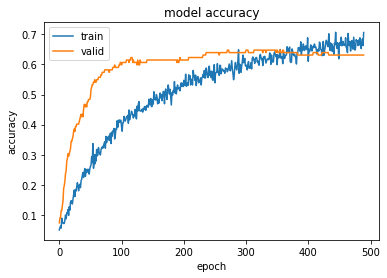

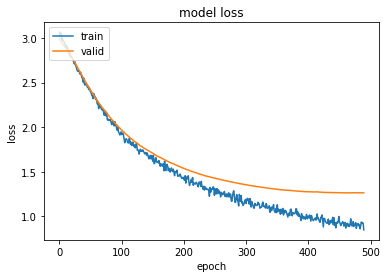

In [62]:
# print out training curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

In [ ]:
# References
# https://future-chem.com/rdkit-google-colab/#toc5
# https://www.rdkit.org/docs/index.html